In [30]:
install.packages("ggthemes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [31]:
install.packages("wesanderson")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [32]:
#importing the necessary libraries
library(tidyverse)
library(ggthemes)
library(wesanderson)

In [33]:
#reading the data from a csv file
emp <- read.table("/Users/manoharsaijasti/employee-data.csv", sep =',', header =T, skip = 23, stringsAsFactors = FALSE)
head(emp)

emp_no,first_name,last_name,birth_date,gender,title,salary,latest_start_date,end_of_contract_date
10001,Georgi,Facello,02/09/1953,M,Senior Engineer,60117,22/06/2010,01/01/9999
10002,Bezalel,Simmel,02/06/1964,F,Staff,65828,02/08/2001,01/01/9999
10003,Parto,Bamford,03/12/1959,M,Senior Engineer,40006,01/12/2001,01/01/9999
10004,Chirstian,Koblick,01/05/1954,M,Engineer,40054,27/11/2001,01/01/9999
10005,Kyoichi,Maliniak,21/01/1955,M,Senior Staff,78228,09/09/2001,01/01/9999
10006,Anneke,Preusig,20/04/1953,F,Senior Engineer,40000,02/08/2001,01/01/9999


In [34]:
emp <- as.tibble(emp)
#encoding the categorical variables
emp$gender <- as.factor(emp$gender)
emp$title <- as.factor(emp$title)

In [35]:
#creating a dataframe in which salaries of the employees above 45,000 per year
emp.a <- filter(emp, salary > 45000)

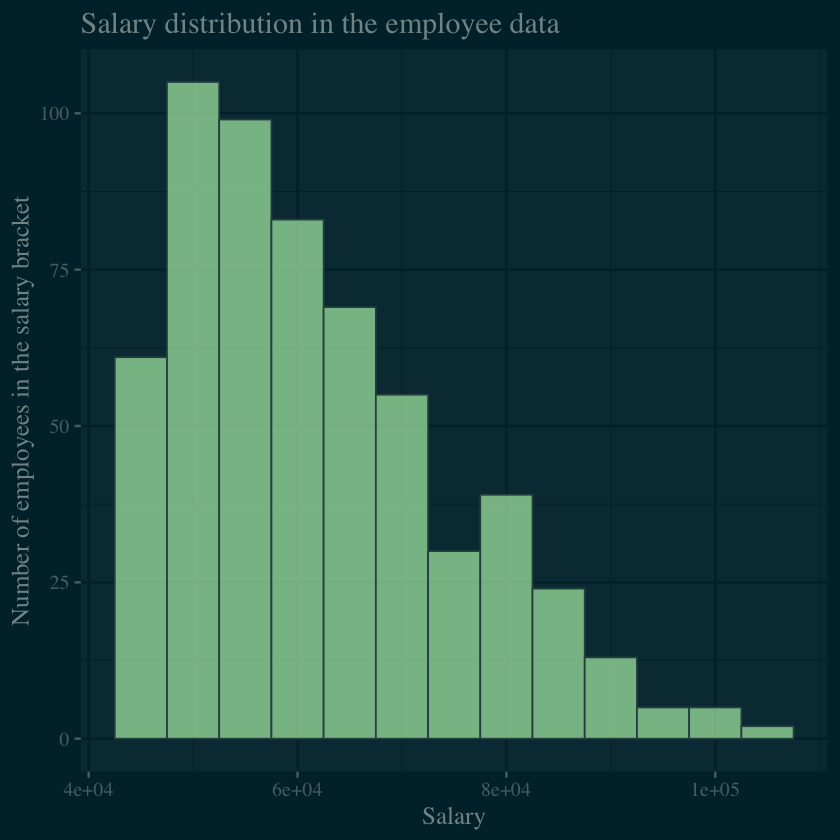

In [36]:
#plotting the salary frequences using ggplot2
hist <- ggplot(emp.a, aes(salary))
hist + geom_histogram(binwidth = 5000, color = "darkslategray",
                      fill = "darkseagreen2", alpha = 0.7) +
  labs(title = "Salary distribution in the employee data",
       x = "Salary", y = "Number of employees in the salary bracket") +
  theme_solarized_2(light = FALSE, base_size = 15, base_family = "serif")

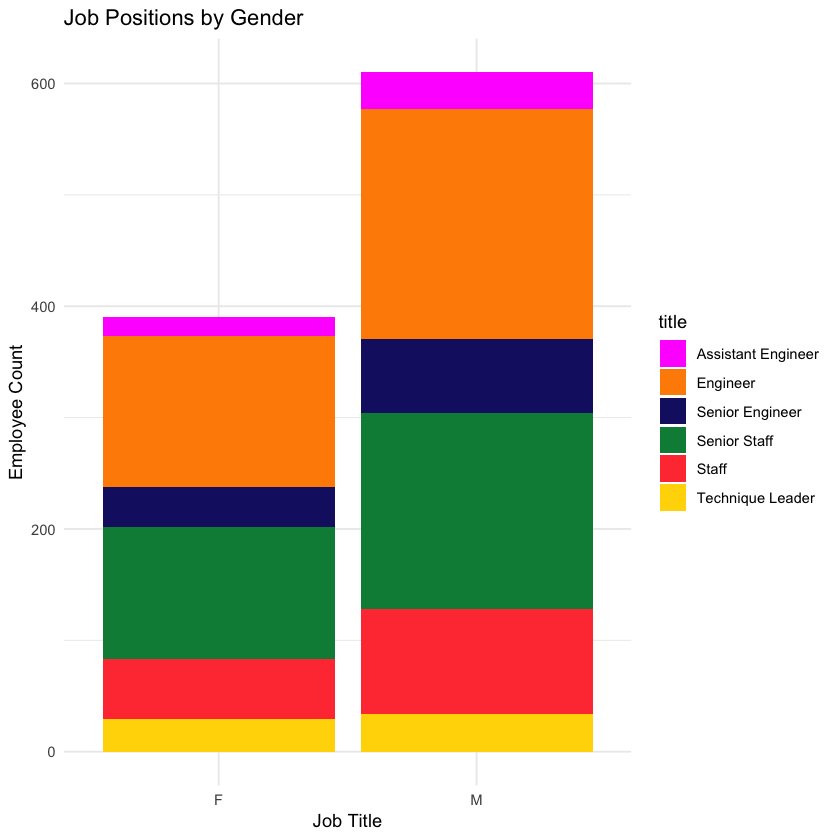

In [37]:
#Creating a bar chart which represents the number of employees in the different positions in the employees data by gender.
bar <- ggplot(emp, aes(gender, fill = title)) 
bar + geom_bar() + theme_minimal() + scale_fill_manual(values = c("magenta", "darkorange", "midnightblue",
                                                                          "springgreen4", "brown1", "gold")) +
  labs(x="Job Title", y= "Employee Count", title = "Job Positions by Gender") 


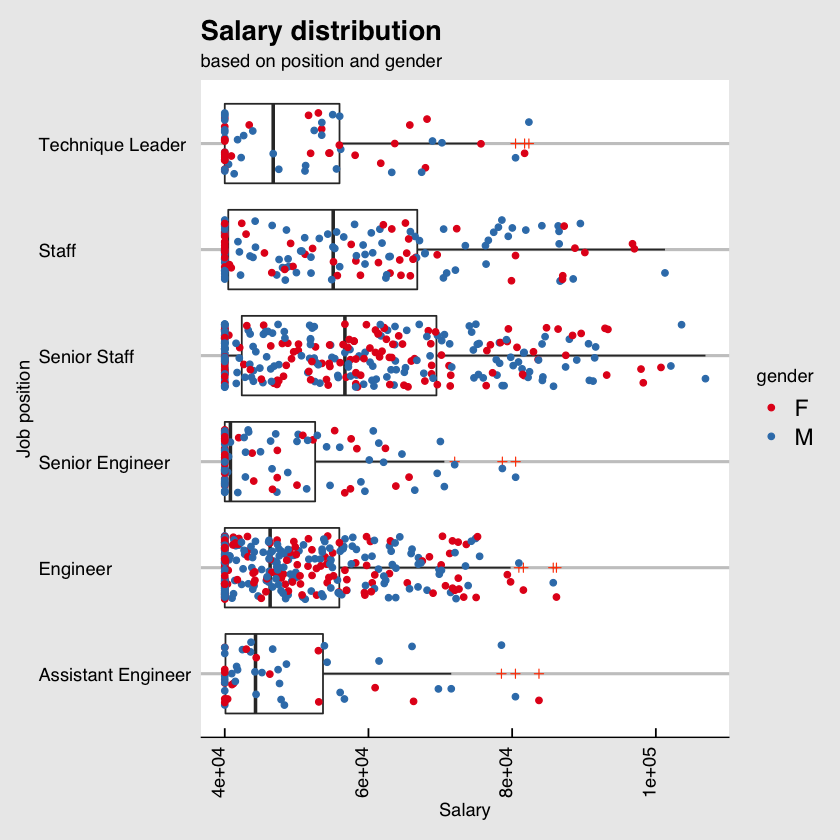

In [38]:
#creating a box plot showing the salary distribution according to position.
boxx <- ggplot(emp, aes(x = title, y = salary))
my.bp <- boxx + geom_boxplot(outlier.color = "orangered1", outlier.shape = 3) +
  geom_jitter(width = 0.3, aes(color = gender)) +
  ggtitle("Salary distribution", subtitle = "based on position and gender") +
  ylab("Salary") + xlab("Job position") + 
  theme_economist_white() + 
  theme(legend.position = "right", axis.text.x = element_text(angle = 90, hjust = 1)) +
  coord_flip() 

my.bp + scale_color_brewer(palette="Set1")
